In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [74]:
# Load the dataset
file_path = 'data.csv'
data = pd.read_csv(file_path)

In [75]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [76]:
# check the length and shape of the data
print(f"There are {len(data)} rows in the dataset.")
print(f"Shape of Data is {data.shape}",) # >>> (rows , columns)

There are 4600 rows in the dataset.
Shape of Data is (4600, 18)


In [77]:
# remove the columns that are not in number
columns_to_remove = ['date', 'waterfront', 'street', 'city', 'statezip', 'country']
data = data.drop(columns=columns_to_remove)

In [78]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,3,1070,1020,1974,0


In [79]:
# shape after dropping some columns
print(f"Shape of Data is {data.shape}",) # >>> (rows , columns)

Shape of Data is (4600, 12)


In [80]:
# to check the duplication in out text
total_duplicate_titles = sum(data.duplicated())
print(f"\nThere are {total_duplicate_titles} duplicate data.")


There are 0 duplicate data.


In [81]:
# Count the missing values in each column
missing_count = data.isnull().sum()
# Display columns with missing values
print("Columns with Missing Values:")
print(missing_count[missing_count > 0])

Columns with Missing Values:
Series([], dtype: int64)


In [82]:
# finding the outliers in our data
clf = IsolationForest(contamination=0.05)
outliers = clf.fit_predict(data) == -1
outliers

array([False,  True, False, ..., False, False, False])

In [83]:
# Identify the indices of the rows containing outliers
outlier_indices = data.index[outliers]
# Remove the rows with outliers
data = data.drop(outlier_indices)


In [84]:
# check the length and shape of the data
print(f"There are {len(data)} rows in the dataset after removing the outliers.")
print(f"Shape of Data is {data.shape}",) # >>> (rows , columns)

There are 4370 rows in the dataset after removing the outliers.
Shape of Data is (4370, 12)


In [85]:
# Our data set  <<Features>> <<Labels>>
x = data.iloc[:, :data.shape[1]-1]
y = data.iloc[:, 0]
len(x), len(y)

(4370, 4370)

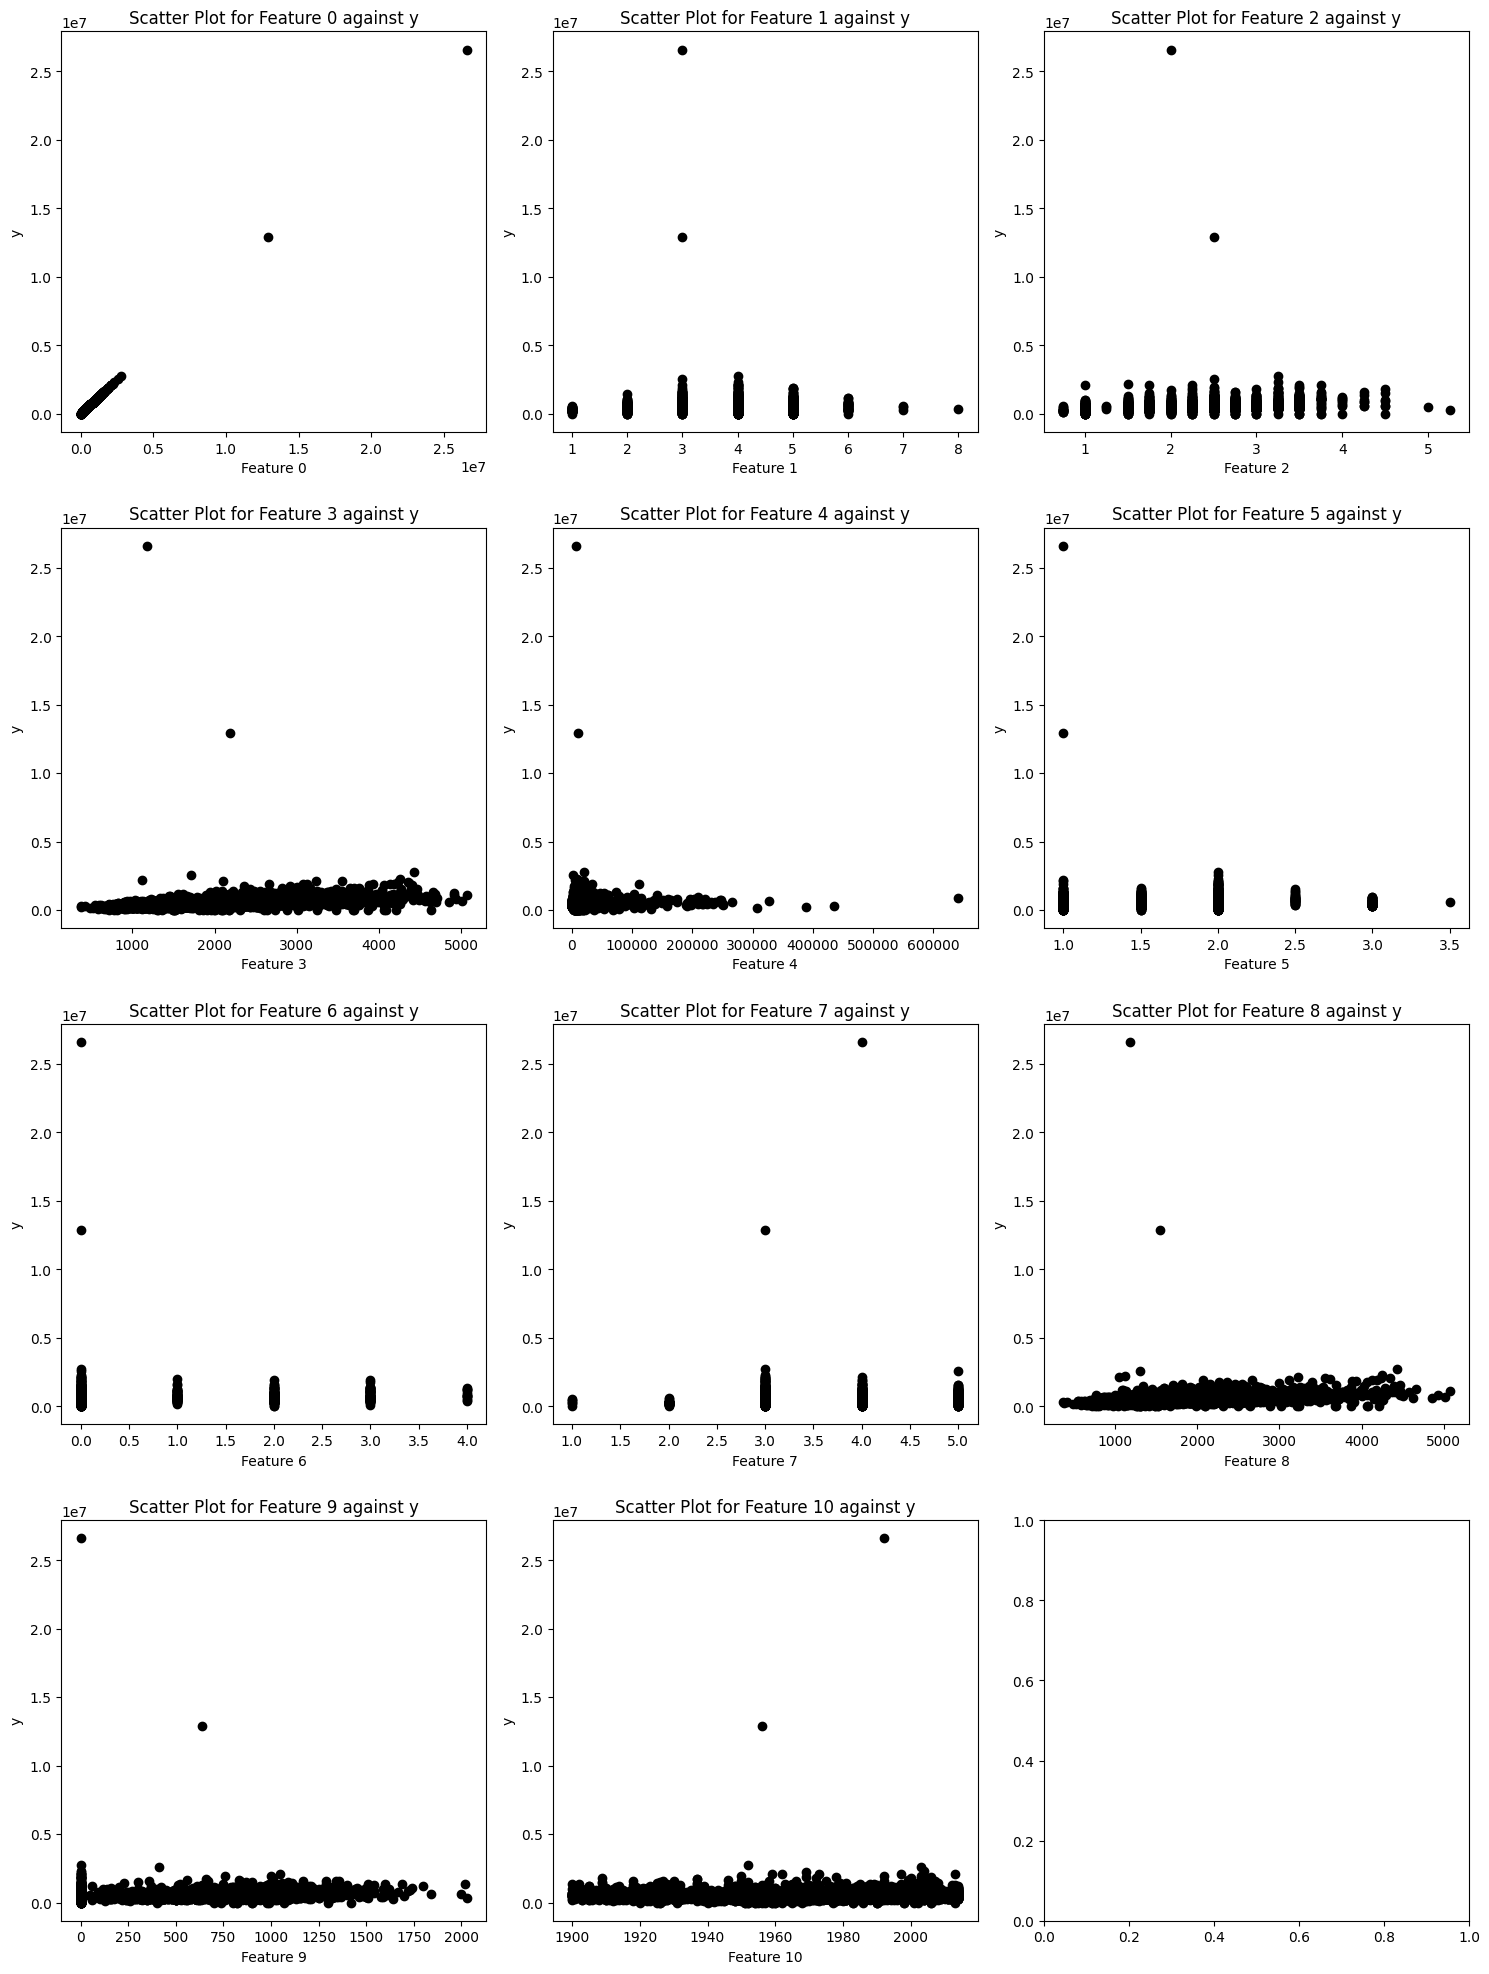

In [86]:
num_features = x.shape[1]

# Determine the number of rows and columns for subplots
num_rows = int(np.ceil(num_features / 3))
num_cols = min(num_features, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Loop through each column and plot the scatter plot in the corresponding subplot
for feature_index, ax in enumerate(axes):
    if feature_index < num_features:
        chosen_feature = x.iloc[:, feature_index]

        ax.scatter(chosen_feature, y, color='black')
        ax.set_xlabel(f'Feature {feature_index}')
        ax.set_ylabel('y')
        ax.set_title(f'Scatter Plot for Feature {feature_index} against y')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [87]:
# Columns which you want to show on the graph
chosen_feature_index = 0

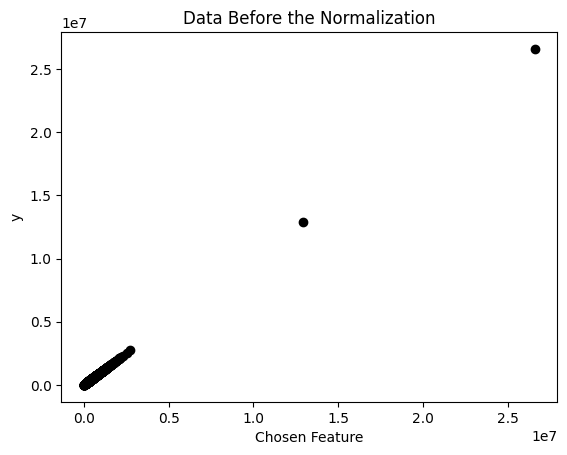

In [88]:
# Choose a specific feature from x data  (e.g., the first feature)
chosen_feature = x.iloc[:, chosen_feature_index]

plt.scatter(chosen_feature, y, color='black')
plt.xlabel('Chosen Feature')
plt.ylabel('y')
plt.title('Data Before the Normalization')
plt.show()


In [89]:
# standardize/ Normalize the data
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.38911823, -0.41009727, -0.84948414, ..., -0.54377608,
        -0.67503061, -0.538031  ],
       [-0.33263332, -0.41009727, -0.13290356, ...,  0.22892609,
        -0.67503061, -0.16580829],
       [-0.18070838, -0.41009727,  0.22538673, ..., -0.98906208,
         1.77592245, -0.26732358],
       ...,
       [-0.1867383 , -0.41009727,  0.58367702, ...,  1.64336397,
        -0.67503061,  1.28924409],
       [-0.60259226,  0.76738307, -0.13290356, ..., -0.89738555,
         1.82494151,  0.10489913],
       [-0.56909086, -0.41009727,  0.58367702, ..., -0.34732638,
        -0.67503061,  0.64631397]])

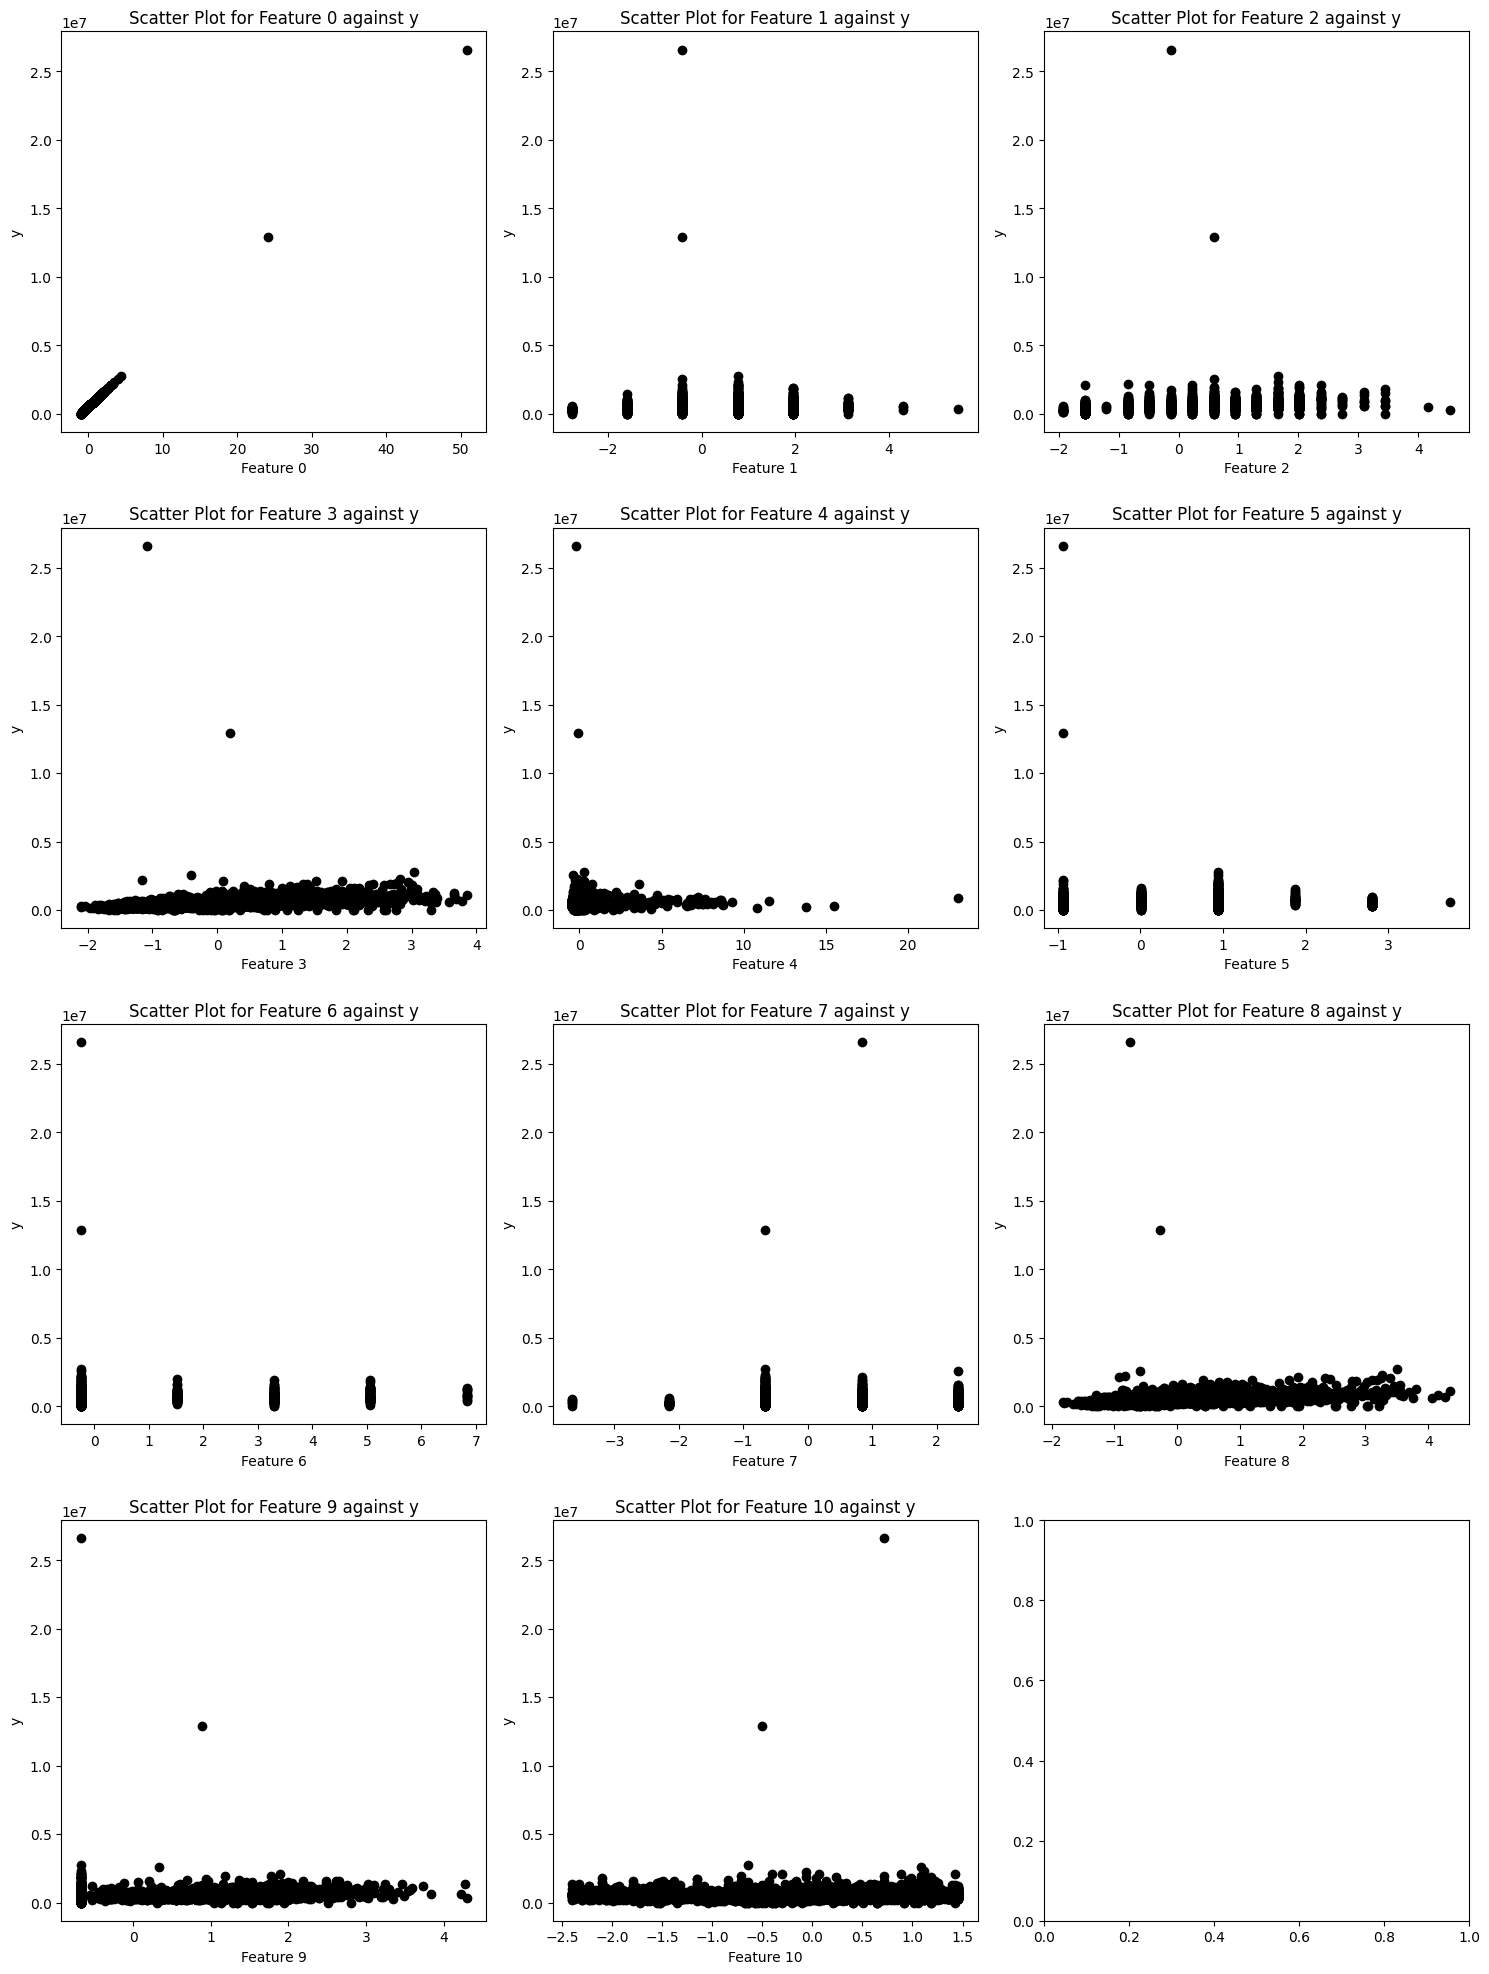

In [90]:
num_features = x.shape[1]

# Determine the number of rows and columns for subplots
num_rows = int(np.ceil(num_features / 3))
num_cols = min(num_features, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Loop through each column and plot the scatter plot in the corresponding subplot
for feature_index, ax in enumerate(axes):
    if feature_index < num_features:
        chosen_feature = x[:, feature_index]

        ax.scatter(chosen_feature, y, color='black')
        ax.set_xlabel(f'Feature {feature_index}')
        ax.set_ylabel('y')
        ax.set_title(f'Scatter Plot for Feature {feature_index} against y')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [91]:
# Split the data into train and test
xTrain, xTest, yTrain, yTest = train_test_split(x,y,random_state=5,test_size=0.2)
len(xTrain), len(yTrain), len(xTest), len(yTest)

(3496, 3496, 874, 874)

In [92]:
# Train the model
model = LinearRegression()
model.fit(xTrain, yTrain)

LinearRegression()

In [93]:
# Prediction on the Test data
yPred = model.predict(xTest)


In [94]:
# Finding the mean squared error
mae = mean_absolute_error(yTest, yPred)
print(f'Mean Absolute Error: {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(yTest, yPred)
print(f'Mean Squared Error: {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 4.313294232334916e-10
Mean Squared Error: 2.9786378779916786e-18
Root Mean Squared Error: 1.7258730770226641e-09


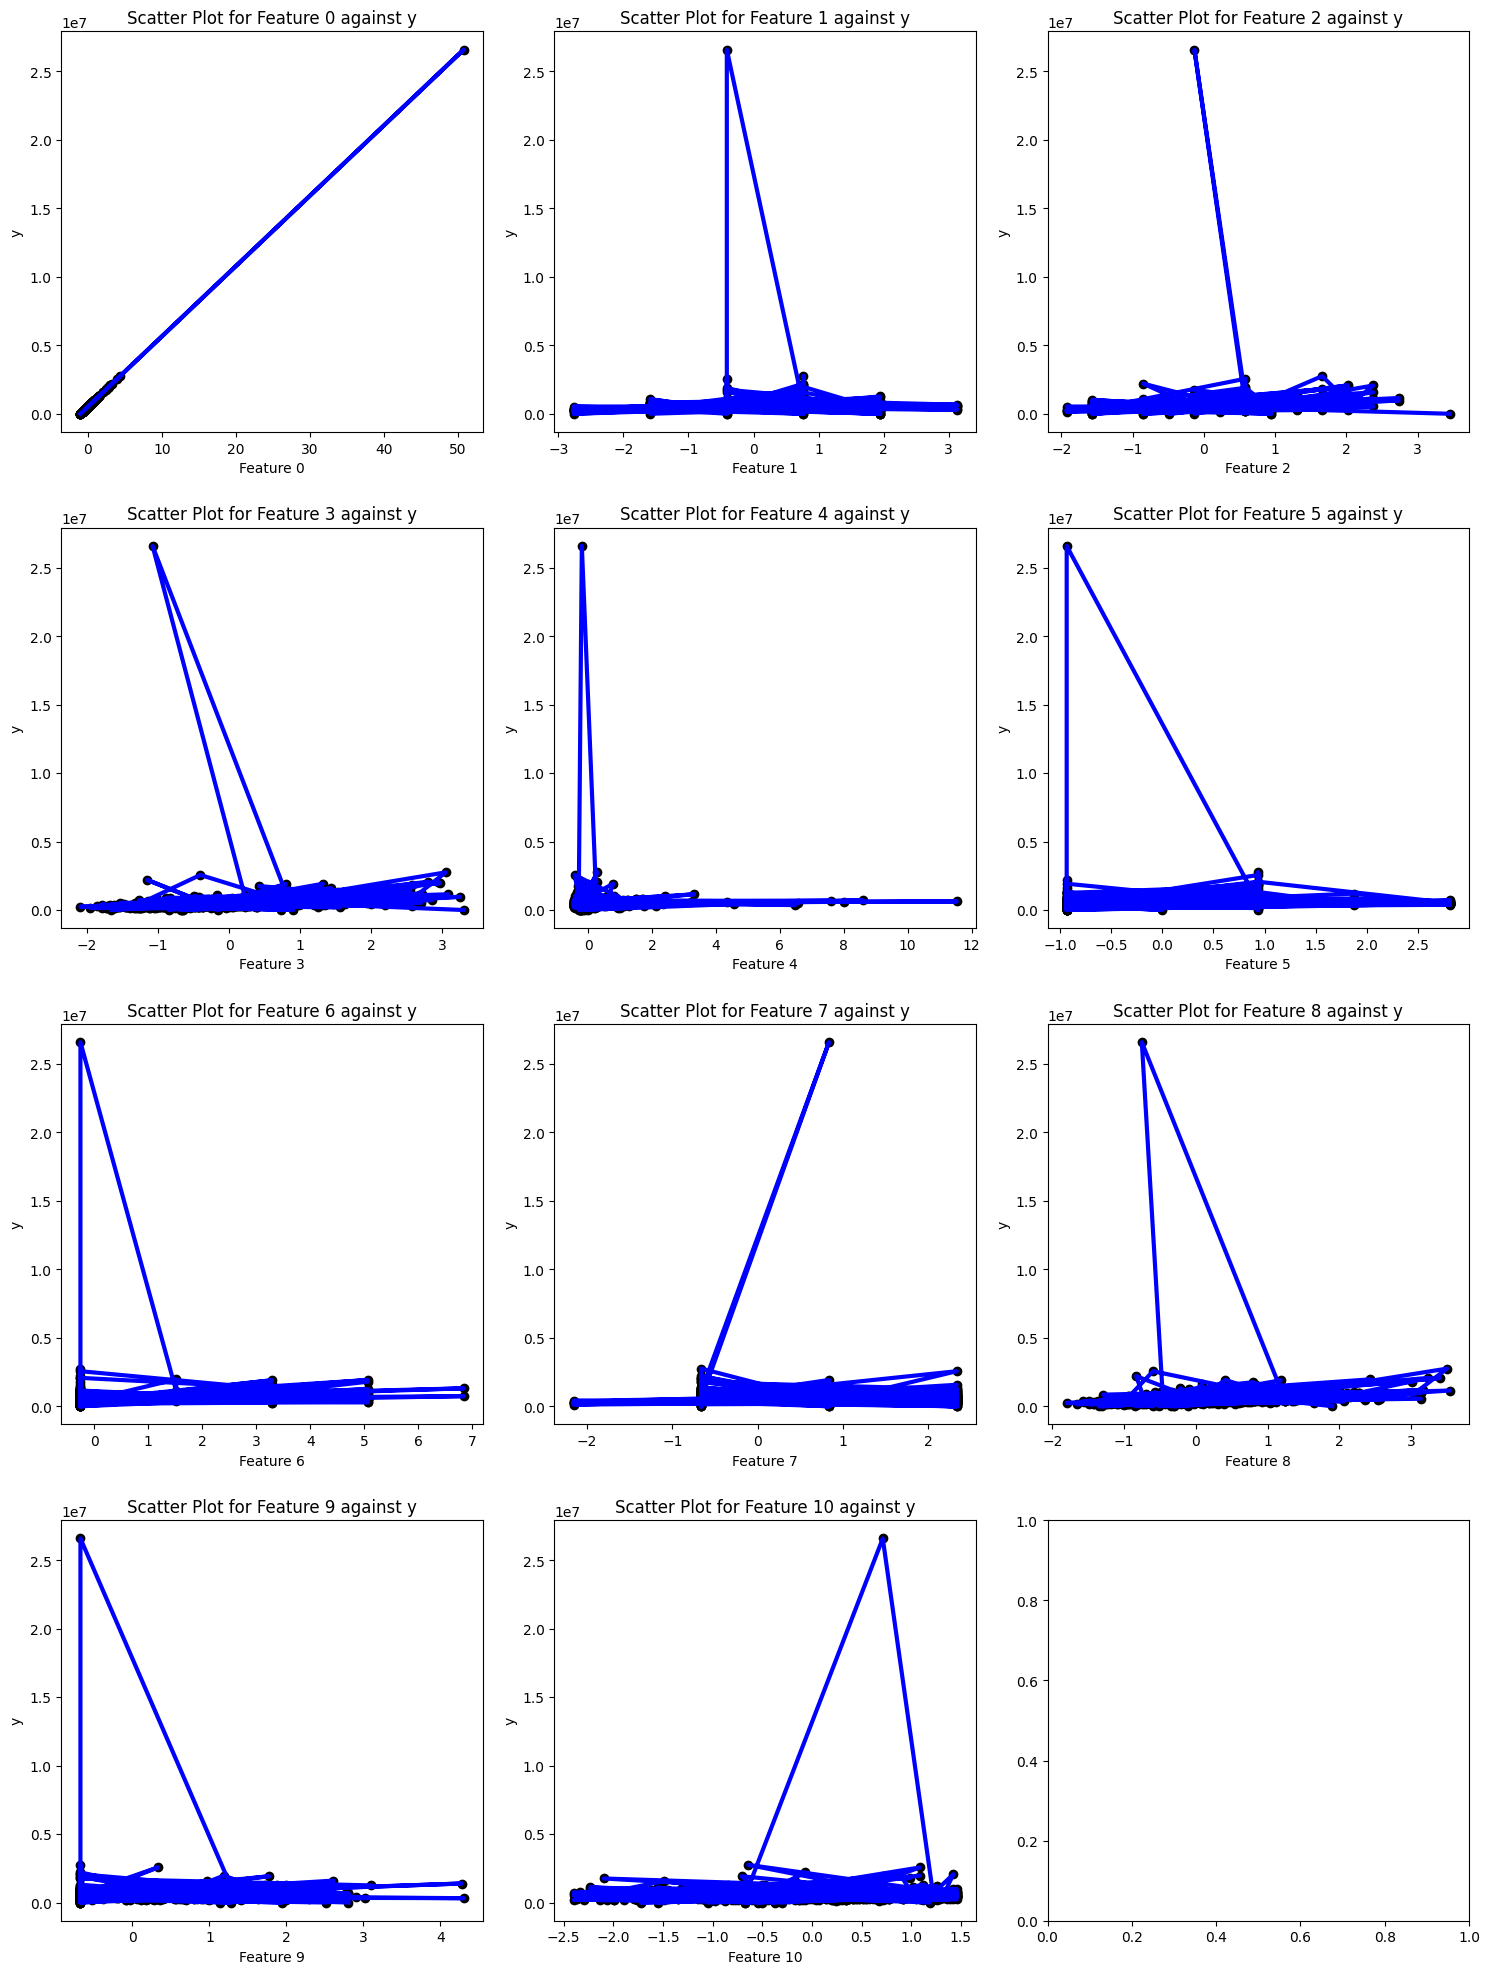

In [95]:
num_features = x.shape[1]

# Determine the number of rows and columns for subplots
num_rows = int(np.ceil(num_features / 3))
num_cols = min(num_features, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Loop through each column and plot the scatter plot in the corresponding subplot
for feature_index, ax in enumerate(axes):
    if feature_index < num_features:
        chosen_feature = xTest[:, feature_index]

        ax.scatter(chosen_feature, yTest, color='black')
        ax.plot(chosen_feature, yPred, color='blue', linewidth=3)
        ax.set_xlabel(f'Feature {feature_index}')
        ax.set_ylabel('y')
        ax.set_title(f'Scatter Plot for Feature {feature_index} against y')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


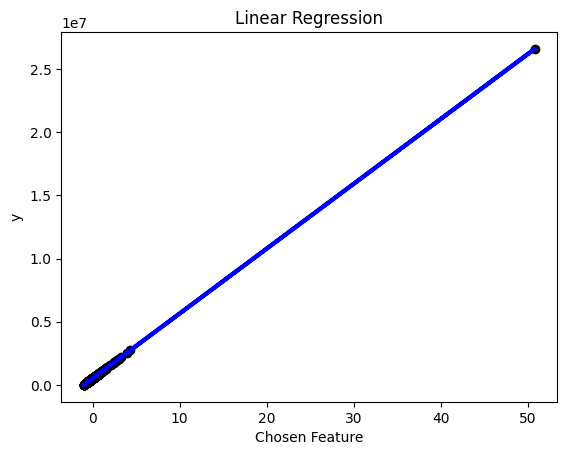

In [96]:
# Choose a specific feature from xTest (e.g., the first feature)
chosen_feature = xTest[:, chosen_feature_index]

# Plot the regression line
plt.scatter(chosen_feature, yTest, color='black')
plt.plot(chosen_feature, yPred, color='blue', linewidth=3)
plt.xlabel('Chosen Feature')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()
